<a href="https://colab.research.google.com/github/prof-sd1/Data-Science/blob/main/AI_module_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 5: Natural Language Processing (NLP)



## **5.1: Text Preprocessing: Tokenization, Stopwords, Lemmatization**


### **5.1.1 The Importance of Text Preprocessing**

  * **Concept:** Raw text data is often messy, unstructured, and contains noise that can hinder a machine learning model's performance. Consider:

      * **Variations of the same word:** "run", "running", "ran", "runs" all refer to the same base action.
      * **Common, uninformative words:** "the", "a", "is", "are" often don't contribute much to the meaning for classification tasks.
      * **Punctuation, special characters, numbers:** These might not be relevant depending on the task.
      * **Case sensitivity:** "Apple" (company) vs. "apple" (fruit) might be treated as different words by a model if not normalized.

    Text preprocessing aims to clean, normalize, and simplify text data, making it more consistent and extracting relevant features, thereby improving the efficiency and accuracy of NLP models.

  * **Colab Explanation:**

In [1]:
print("--- 5.1.1 The Importance of Text Preprocessing ---")

raw_text = "Text preprocessing is an essential step in Natural Language Processing (NLP). It helps clean and prepare the data!"

print(f"Original Raw Text:\n'{raw_text}'")
print("\nImagine trying to analyze this text without cleaning it:")
print("- 'processing' vs. 'process' (different forms of the same word)")
print("- 'is', 'an', 'in', 'it' (common words that might not add much meaning)")
print("- Parentheses, exclamation marks (punctuation noise)")
print("- Capitalization ('Natural' vs. 'natural')")

print("\nPreprocessing aims to standardize these variations and remove noise so models can focus on meaningful content.")

--- 5.1.1 The Importance of Text Preprocessing ---
Original Raw Text:
'Text preprocessing is an essential step in Natural Language Processing (NLP). It helps clean and prepare the data!'

Imagine trying to analyze this text without cleaning it:
- 'processing' vs. 'process' (different forms of the same word)
- 'is', 'an', 'in', 'it' (common words that might not add much meaning)
- Parentheses, exclamation marks (punctuation noise)
- Capitalization ('Natural' vs. 'natural')

Preprocessing aims to standardize these variations and remove noise so models can focus on meaningful content.


* **Exercise:**

    1.  Provide two examples of noise or inconsistencies you might find in a raw text document (e.g., from a web scrape or social media), beyond those mentioned above.
    2.  If you were building a model to detect the sentiment (positive/negative) of customer reviews, why might removing punctuation be a necessary preprocessing step? Conversely, when might keeping it be important?

-----

### **5.1.2 Tokenization: Breaking Down Text**

  * **Concept:** Tokenization is the process of splitting a longer string of text into smaller, meaningful units called "tokens." These tokens are often words, but they can also be punctuation marks, numbers, or even sub-word units.

      * **Word Tokenization:** Divides text into individual words. This is the most common type for many NLP tasks.
      * **Sentence Tokenization:** Divides text into individual sentences. Useful for tasks that require sentence-level understanding.

  * **Libraries:** NLTK (Natural Language Toolkit) is a popular library for foundational NLP tasks, including tokenization.

  * **Colab Example:**

In [3]:
# --- 5.1.2 Tokenization: Breaking Down Text  ---

import re
import nltk

print("\n--- 5.1.2 Tokenization: Breaking Down Text ---")

def ensure_punkt_resources() -> bool:
    """
    Ensure NLTK punkt resources are available.
    Tries to download 'punkt' (and 'punkt_tab' for newer NLTK) if missing.
    Returns True if punkt is usable; False if we should fall back.
    """
    def have(path: str) -> bool:
        try:
            nltk.data.find(path)
            return True
        except LookupError:
            return False

    have_punkt = have('tokenizers/punkt')
    have_punkt_tab = have('tokenizers/punkt_tab')  # present in some newer NLTK versions

    if not have_punkt:
        try:
            nltk.download('punkt', quiet=True, raise_on_error=False)
            have_punkt = have('tokenizers/punkt')
        except Exception:
            have_punkt = False

    if not have_punkt_tab:
        # Not all NLTK versions have 'punkt_tab'; failure here shouldn't block usage
        try:
            nltk.download('punkt_tab', quiet=True, raise_on_error=False)
            have_punkt_tab = have('tokenizers/punkt_tab') or True
        except Exception:
            have_punkt_tab = True

    return bool(have_punkt and have_punkt_tab)

USE_NLTK = ensure_punkt_resources()

# -------------------- Fallback Tokenizers --------------------
def word_tokenize_fallback(text: str):
    # Basic tokenization: words (with simple apostrophes) and punctuation
    return re.findall(r"\w+(?:'\w+)?|[^\w\s]", text)

def sent_tokenize_fallback(text: str):
    # Split on sentence enders followed by whitespace
    return re.split(r'(?<=[.!?])\s+', text.strip())

# -------------------- Choose Tokenizers --------------------
if USE_NLTK:
    from nltk.tokenize import word_tokenize as _word_tokenize, sent_tokenize as _sent_tokenize
    try:
        # Probe to ensure resources are actually usable at runtime
        _ = _word_tokenize("probe.")
        _ = _sent_tokenize("Probe. Works?")
        word_tokenize = _word_tokenize
        sent_tokenize = _sent_tokenize
        print("Using NLTK tokenizers (punkt).")
    except LookupError:
        word_tokenize = word_tokenize_fallback
        sent_tokenize = sent_tokenize_fallback
        print("NLTK punkt unavailable at runtime; using regex fallbacks.")
else:
    word_tokenize = word_tokenize_fallback
    sent_tokenize = sent_tokenize_fallback
    print("NLTK punkt not found and could not download; using regex fallbacks.")

# -------------------- Demo Text --------------------
text_to_tokenize = (
    "Text preprocessing is crucial for NLP. "
    "It involves breaking down text into tokens, like words or sentences."
)

# -------------------- Word Tokenization --------------------
words = word_tokenize(text_to_tokenize)
print(f"\nOriginal Text:\n'{text_to_tokenize}'")
print(f"\nWord Tokens:\n{words}")
print(f"Number of word tokens: {len(words)}")

# -------------------- Sentence Tokenization --------------------
sentences = sent_tokenize(text_to_tokenize)
print(f"\nSentence Tokens:\n{sentences}")
print(f"Number of sentence tokens: {len(sentences)}")

# -------------------- Keras Tokenizer (Vocabulary) --------------------
from tensorflow.keras.preprocessing.text import Tokenizer
keras_tokenizer = Tokenizer(oov_token="<OOV>")
keras_tokenizer.fit_on_texts([text_to_tokenize])
keras_words = list(keras_tokenizer.word_index.keys())
print(f"\nWord Tokens (Keras Tokenizer):\n{keras_words}")



--- 5.1.2 Tokenization: Breaking Down Text ---
Using NLTK tokenizers (punkt).

Original Text:
'Text preprocessing is crucial for NLP. It involves breaking down text into tokens, like words or sentences.'

Word Tokens:
['Text', 'preprocessing', 'is', 'crucial', 'for', 'NLP', '.', 'It', 'involves', 'breaking', 'down', 'text', 'into', 'tokens', ',', 'like', 'words', 'or', 'sentences', '.']
Number of word tokens: 20

Sentence Tokens:
['Text preprocessing is crucial for NLP.', 'It involves breaking down text into tokens, like words or sentences.']
Number of sentence tokens: 2

Word Tokens (Keras Tokenizer):
['<OOV>', 'text', 'preprocessing', 'is', 'crucial', 'for', 'nlp', 'it', 'involves', 'breaking', 'down', 'into', 'tokens', 'like', 'words', 'or', 'sentences']


* **Exercise:**

    1.  Given the sentence: "Dr. Smith said, 'Hello world\!'", what might be the word tokens generated by `nltk.word_tokenize`? Run the code to verify.
    2.  Why might it be important to perform sentence tokenization before word tokenization for certain NLP tasks (e.g., text summarization)?

-----

### **5.1.3 Stopwords: Removing Common Words**

  * **Concept:** Stopwords are very common words in a language (e.g., "the", "is", "a", "an", "in", "for", "on") that often carry little semantic meaning and do not contribute significantly to the overall understanding or classification of a document. Removing them can:

      * **Reduce dimensionality:** Decrease the number of unique words in the vocabulary, making models more efficient.
      * **Improve focus:** Allow models to concentrate on more meaningful and discriminative words.

  * **Libraries:** NLTK provides a list of stopwords for various languages.

  * **Colab Example:**

In [5]:
# --- 5.1.3 Stopwords: Removing Common Words (Final Fixed Code) ---

import re
import nltk

print("\n--- 5.1.3 Stopwords: Removing Common Words ---")

# -------------------- Utilities --------------------
def ensure_resource(resource_path: str, download_name: str) -> bool:
    """
    Ensure an NLTK resource exists locally. Try to download if missing.
    Returns True if available after checks; False otherwise (e.g., offline).
    """
    try:
        nltk.data.find(resource_path)
        return True
    except LookupError:
        try:
            nltk.download(download_name, quiet=True, raise_on_error=False)
            nltk.data.find(resource_path)
            return True
        except Exception:
            return False

# Ensure stopwords and punkt (punkt is needed by word_tokenize)
HAVE_STOPWORDS = ensure_resource('corpora/stopwords', 'stopwords')
HAVE_PUNKT = ensure_resource('tokenizers/punkt', 'punkt') and (
    # Some NLTK versions also use punkt_tab; don't fail if absent
    ensure_resource('tokenizers/punkt_tab', 'punkt_tab') or True
)

# -------------------- Fallbacks --------------------
# A compact fallback English stopword list (if NLTK stopwords unavailable)
FALLBACK_STOPWORDS = {
    "a","an","the","and","or","but","if","while","of","at","by","for","with",
    "about","against","between","into","through","during","before","after",
    "above","below","to","from","up","down","in","out","on","off","over","under",
    "again","further","then","once","here","there","when","where","why","how",
    "all","any","both","each","few","more","most","other","some","such","no",
    "nor","not","only","own","same","so","than","too","very","can","will","just",
    "don","should","now","is","am","are","was","were","be","been","being","do",
    "does","did","having","have","has","had","he","she","it","they","you","we",
    "me","him","her","them","your","yours","their","theirs","our","ours","my","mine",
    "this","that","these","those","as","because","until","while","what","which","who","whom"
}

def word_tokenize_fallback(text: str):
    # Basic tokenizer: words (incl. simple contractions) + punctuation tokens
    return re.findall(r"\w+(?:'\w+)?|[^\w\s]", text)

def sent_tokenize_fallback(text: str):
    return re.split(r'(?<=[.!?])\s+', text.strip())

# -------------------- Select Tokenizers & Stopwords --------------------
if HAVE_PUNKT:
    try:
        from nltk.tokenize import word_tokenize as _word_tokenize
        # quick probe
        _ = _word_tokenize("probe.")
        word_tokenize = _word_tokenize
        print("Using NLTK word_tokenize (punkt).")
    except LookupError:
        word_tokenize = word_tokenize_fallback
        print("NLTK punkt unavailable at runtime; using regex fallback for tokenization.")
else:
    word_tokenize = word_tokenize_fallback
    print("NLTK punkt not found and could not download; using regex fallback for tokenization.")

if HAVE_STOPWORDS:
    try:
        from nltk.corpus import stopwords as _stopwords
        STOP_WORDS = set(_stopwords.words('english'))
        print("Using NLTK English stopwords.")
    except LookupError:
        STOP_WORDS = FALLBACK_STOPWORDS
        print("NLTK stopwords unavailable at runtime; using fallback stopword list.")
else:
    STOP_WORDS = FALLBACK_STOPWORDS
    print("NLTK stopwords not found and could not download; using fallback stopword list.")

# -------------------- Demo Texts --------------------
sample_text = "The quick brown fox jumps over the lazy dog. This is a very common sentence for demonstration purposes."

# -------------------- Tokenize & Remove Stopwords --------------------
words = word_tokenize(sample_text.lower())  # lowercase for matching
filtered_words = [w for w in words if w.isalpha() and w not in STOP_WORDS]

print(f"\nExample English Stopwords (first 10):\n{list(STOP_WORDS)[:10]}")
print(f"\nOriginal words (lowercase, including punctuation):\n{words}")
print(f"Words after removing stopwords and punctuation:\n{filtered_words}")

# -------------------- Meaning Impact Demo --------------------
original_sentence = "This document is about the legal implications of artificial intelligence."
orig_tokens = word_tokenize(original_sentence.lower())
filtered_sentence_words = [w for w in orig_tokens if w.isalpha() and w not in STOP_WORDS]

print(f"\nOriginal sentence: '{original_sentence}'")
print(f"Filtered words: {filtered_sentence_words}")



--- 5.1.3 Stopwords: Removing Common Words ---
Using NLTK word_tokenize (punkt).
Using NLTK English stopwords.

Example English Stopwords (first 10):
['doesn', 'hadn', "they're", 'to', 'once', "they'd", 'the', 'doing', 'whom', 'no']

Original words (lowercase, including punctuation):
['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.', 'this', 'is', 'a', 'very', 'common', 'sentence', 'for', 'demonstration', 'purposes', '.']
Words after removing stopwords and punctuation:
['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', 'common', 'sentence', 'demonstration', 'purposes']

Original sentence: 'This document is about the legal implications of artificial intelligence.'
Filtered words: ['document', 'legal', 'implications', 'artificial', 'intelligence']


* **Exercise:**

    1.  Why might removing stopwords be particularly beneficial for a document classification task, but potentially detrimental for a machine translation task?
    2.  If you're dealing with a highly specialized domain (e.g., medical texts), why might you need to customize your list of stopwords rather than just using the default NLTK list?

-----

### **5.1.4 Stemming and Lemmatization: Word Normalization**

  * **Concept:** Both stemming and lemmatization are techniques used to reduce inflected (or derived) words to their base or root form. This helps in standardizing words and reducing the vocabulary size, treating words like "run," "running," and "ran" as the same token.

      * **Stemming:** A more crude process that chops off suffixes from words. It often produces "stems" that are not actual words. It's faster but less accurate.

          * Example: "connection", "connected", "connecting" -\> "connect" (Porter Stemmer)
          * Example: "beautiful" -\> "beauti" (not a real word)

      * **Lemmatization:** A more sophisticated process that uses vocabulary and morphological analysis (part of speech) to return the base or dictionary form of a word, known as its "lemma." It's slower but more accurate as it always results in a real word.

          * Example: "better" -\> "good" (based on context)
          * Example: "ran" -\> "run"
          * Example: "caring" -\> "care"

  * **Libraries:** NLTK for stemming and lemmatization. SpaCy is another powerful library that excels at lemmatization (often with better accuracy due to its statistical models).

  * **Colab Example:**

In [7]:
# --- 5.1.4 Stemming and Lemmatization: Word Normalization (Final Fixed Code) ---

import nltk
import sys

print("\n--- 5.1.4 Stemming and Lemmatization: Word Normalization ---")

# -------------------- Utilities --------------------
def ensure_resource(resource_path: str, download_name: str) -> bool:
    """
    Ensure an NLTK resource exists locally. Try to download if missing.
    Returns True if available after checks; False otherwise (e.g., offline).
    """
    try:
        nltk.data.find(resource_path)
        return True
    except LookupError:
        try:
            nltk.download(download_name, quiet=True, raise_on_error=False)
            nltk.data.find(resource_path)
            return True
        except Exception:
            return False

# PorterStemmer is built into NLTK; no extra data needed.
# WordNet + OMW are needed for high-quality lemmatization.
HAVE_WORDNET = ensure_resource('corpora/wordnet', 'wordnet')
# OMW improves coverage but is optional; don't fail if absent.
_ = ensure_resource('corpora/omw-1.4', 'omw-1.4')

# -------------------- Imports --------------------
from nltk.stem import PorterStemmer, WordNetLemmatizer

# -------------------- Sample Data --------------------
words_to_normalize = [
    "running", "runs", "ran", "runner",
    "easily", "good", "better",
    "connection", "connections", "connective"
]

# -------------------- Stemming (Porter) --------------------
porter = PorterStemmer()
stemmed_words = [porter.stem(w) for w in words_to_normalize]

print(f"\nOriginal words:\n{words_to_normalize}")
print(f"Stemmed words (Porter Stemmer):\n{stemmed_words}")

# -------------------- Lemmatization (NLTK WordNet) --------------------
if HAVE_WORDNET:
    lemmatizer = WordNetLemmatizer()

    # Lemmatize assuming verbs
    lemmas_as_verbs = [lemmatizer.lemmatize(w, pos='v') for w in words_to_normalize]
    # Demonstrate adjective lemmatization for 'good'/'better'
    lemmas_adj_demo = [lemmatizer.lemmatize(w, pos='a') for w in ["good", "better"]]

    print(f"\nLemmatized words (NLTK WordNet, pos='v'):\n{lemmas_as_verbs}")
    print(f"Lemmatized 'good', 'better' (NLTK WordNet, pos='a'):\n{lemmas_adj_demo}")
else:
    print("\nNLTK WordNet data not available and could not be downloaded.")
    print("Skipping NLTK lemmatization; showing a simple heuristic fallback (identity).")
    lemmas_as_verbs = words_to_normalize[:]  # identity fallback
    lemmas_adj_demo = ["good", "good"]       # naive example

# -------------------- Lemmatization (spaCy, optional) --------------------
# If spaCy or the model isn't available (e.g., offline env), we skip gracefully.
try:
    import spacy
    try:
        nlp = spacy.load("en_core_web_sm")
        text_for_spacy = " ".join(words_to_normalize + ["good", "better"])
        doc = nlp(text_for_spacy)
        spacy_lemmas = [t.lemma_ for t in doc]
        print(f"\nLemmatized words (spaCy en_core_web_sm):\n{spacy_lemmas}")
    except OSError:
        print("\nspaCy model 'en_core_web_sm' not found. "
              "If online, run: python -m spacy download en_core_web_sm")
        print("Skipping spaCy lemmatization example.")
except Exception as e:
    # spaCy not installed or other environment issue
    print(f"\nspaCy unavailable ({e.__class__.__name__}: {e}). Skipping spaCy lemmatization example.")

print("\nKey difference:")
print("- Stemming: Rule-based, fast, may yield non-words (e.g., 'beauti').")
print("- Lemmatization: Dictionary/POS-based, slower, yields valid base forms (e.g., 'beautiful').")



--- 5.1.4 Stemming and Lemmatization: Word Normalization ---

Original words:
['running', 'runs', 'ran', 'runner', 'easily', 'good', 'better', 'connection', 'connections', 'connective']
Stemmed words (Porter Stemmer):
['run', 'run', 'ran', 'runner', 'easili', 'good', 'better', 'connect', 'connect', 'connect']

NLTK WordNet data not available and could not be downloaded.
Skipping NLTK lemmatization; showing a simple heuristic fallback (identity).

Lemmatized words (spaCy en_core_web_sm):
['run', 'run', 'run', 'runner', 'easily', 'good', 'well', 'connection', 'connection', 'connective', 'good', 'well']

Key difference:
- Stemming: Rule-based, fast, may yield non-words (e.g., 'beauti').
- Lemmatization: Dictionary/POS-based, slower, yields valid base forms (e.g., 'beautiful').


* **Exercise:**

    1.  Explain a scenario where stemming might be preferred over lemmatization, even though lemmatization is generally more accurate.
    2.  Observe the output of NLTK's `WordNetLemmatizer` for "better" without specifying `pos='a'`. Why does it give a different result than when `pos='a'` is specified?

-----

### **5.1.5 Regular Expressions for Text Cleaning**

  * **Concept:** Regular expressions (regex) are powerful patterns used to find and manipulate strings of text. In NLP, they are invaluable for tasks like:

      * Removing punctuation, numbers, or special characters.
      * Finding specific patterns (e.g., email addresses, URLs).
      * Replacing multiple spaces with a single space.
      * Standardizing text formats.

  * **Python Module:** The `re` module in Python.

  * **Colab Example:**

In [8]:
import re

print("\n--- 5.1.5 Regular Expressions for Text Cleaning ---")

dirty_text = "This is some $dirty$ text with numbers 12345, #hashtags, @mentions, and URLs like http://example.com. Also, extra spaces.  "

print(f"Original Dirty Text:\n'{dirty_text}'")

# 1. Remove URLs
cleaned_text = re.sub(r'http\S+|www\S+', '', dirty_text) # removes http/https/www links
print(f"\nAfter removing URLs:\n'{cleaned_text}'")

# 2. Remove mentions (@...) and hashtags (#...)
cleaned_text = re.sub(r'@\S+|#\S+', '', cleaned_text)
print(f"After removing mentions/hashtags:\n'{cleaned_text}'")

# 3. Remove punctuation (keep letters and spaces)
# [^a-zA-Z\s]: Match any character that is NOT a letter (a-z, A-Z) or a whitespace character (\s)
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)
print(f"After removing punctuation/numbers:\n'{cleaned_text}'")

# 4. Convert to lowercase
cleaned_text = cleaned_text.lower()
print(f"After converting to lowercase:\n'{cleaned_text}'")

# 5. Remove extra spaces (replace multiple spaces with a single space)
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip() # .strip() removes leading/trailing whitespace
print(f"After removing extra spaces and stripping:\n'{cleaned_text}'")

# Combine common cleaning steps into a function
def clean_text_with_regex(text):
    text = re.sub(r'http\S+|www\S+', '', text) # URLs
    text = re.sub(r'@\S+|#\S+', '', text)      # Mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)    # Punctuation and numbers
    text = text.lower()                         # Lowercasing
    text = re.sub(r'\s+', ' ', text).strip()   # Extra spaces
    return text

new_dirty_text = "Another example! Visit us at www.mywebsite.com and say hi to @bot. We have 1,000 users!"
cleaned_new_text = clean_text_with_regex(new_dirty_text)
print(f"\nOriginal (new): '{new_dirty_text}'")
print(f"Cleaned (new) : '{cleaned_new_text}'")


--- 5.1.5 Regular Expressions for Text Cleaning ---
Original Dirty Text:
'This is some $dirty$ text with numbers 12345, #hashtags, @mentions, and URLs like http://example.com. Also, extra spaces.  '

After removing URLs:
'This is some $dirty$ text with numbers 12345, #hashtags, @mentions, and URLs like  Also, extra spaces.  '
After removing mentions/hashtags:
'This is some $dirty$ text with numbers 12345,   and URLs like  Also, extra spaces.  '
After removing punctuation/numbers:
'This is some dirty text with numbers    and URLs like  Also extra spaces  '
After converting to lowercase:
'this is some dirty text with numbers    and urls like  also extra spaces  '
After removing extra spaces and stripping:
'this is some dirty text with numbers and urls like also extra spaces'

Original (new): 'Another example! Visit us at www.mywebsite.com and say hi to @bot. We have 1,000 users!'
Cleaned (new) : 'another example visit us at and say hi to we have users'


* **Exercise:**

    1.  Write a simple regular expression to remove all digits (`0-9`) from a string. Test it with `re.sub()`.
    2.  Consider a scenario where you want to extract all email addresses from a large body of text. Briefly describe how you would use regular expressions for this task. (You don't need to write the full regex, just the approach).


## **5.2 Vectorization: TF-IDF, Word2Vec, BERT**

### **5.2.1 Introduction to Text Vectorization**

  * **Concept:**
    Computers understand numbers, not words. Text vectorization is the process of converting textual data into numerical vectors. Each vector represents a piece of text (a word, a sentence, or an entire document) in a way that captures its meaning and relationships with other texts. This numerical representation is what machine learning models ultimately operate on.

      * **Sparse vs. Dense Vectors:**
          * **Sparse Vectors:** Often contain many zeros, meaning most features are absent. Examples include one-hot encodings or count-based methods like TF-IDF. They can be high-dimensional.
          * **Dense Vectors (Embeddings):** Contain mostly non-zero values and are typically much lower-dimensional. They aim to capture semantic relationships, where words with similar meanings are represented by vectors that are "close" to each other in the vector space. Word2Vec and BERT produce dense vectors.

  * **Colab Explanation:**

In [9]:
print("--- 5.2.1 Introduction to Text Vectorization ---")

documents = [
    "The cat sat on the mat.",
    "The dog barked at the cat.",
    "The cat chased the mouse."
]

print("Imagine these three simple documents:")
for i, doc in enumerate(documents):
    print(f"Document {i+1}: '{doc}'")

print("\nTo make a machine learning model understand these, we need to convert them into numbers.")
print("For example, a very basic 'Bag-of-Words' approach counts word occurrences:")

# Simple Bag-of-Words (conceptual)
vocab = sorted(list(set(word for doc in documents for word in doc.replace('.', '').lower().split())))
print(f"\nVocabulary: {vocab}")

bow_vectors = []
for doc in documents:
    doc_vector = [doc.lower().count(word) for word in vocab]
    bow_vectors.append(doc_vector)

print("\nBag-of-Words vectors for each document:")
for i, vec in enumerate(bow_vectors):
    print(f"Doc {i+1}: {vec} (representing '{documents[i]}')")

print("\nThis is a simple form of vectorization. We will explore more sophisticated methods.")

--- 5.2.1 Introduction to Text Vectorization ---
Imagine these three simple documents:
Document 1: 'The cat sat on the mat.'
Document 2: 'The dog barked at the cat.'
Document 3: 'The cat chased the mouse.'

To make a machine learning model understand these, we need to convert them into numbers.
For example, a very basic 'Bag-of-Words' approach counts word occurrences:

Vocabulary: ['at', 'barked', 'cat', 'chased', 'dog', 'mat', 'mouse', 'on', 'sat', 'the']

Bag-of-Words vectors for each document:
Doc 1: [3, 0, 1, 0, 0, 1, 0, 1, 1, 2] (representing 'The cat sat on the mat.')
Doc 2: [2, 1, 1, 0, 1, 0, 0, 0, 0, 2] (representing 'The dog barked at the cat.')
Doc 3: [1, 0, 1, 1, 0, 0, 1, 0, 0, 2] (representing 'The cat chased the mouse.')

This is a simple form of vectorization. We will explore more sophisticated methods.


* **Exercise:**

    1.  Why is it problematic to feed raw text directly into a machine learning algorithm?
    2.  In the Bag-of-Words example above, if a new document "The bird sang." was added, what would be the impact on the vocabulary size and the dimensionality of the vectors?

-----

### **5.2.2 TF-IDF (Term Frequency-Inverse Document Frequency)**

  * **Concept:**
    TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents (corpus). The intuition behind TF-IDF is that if a word appears frequently in a document (high Term Frequency) but rarely in other documents in the corpus (high Inverse Document Frequency), it is likely to be very relevant to that specific document.

      * **Term Frequency (TF):** Measures how frequently a term appears in a document.
          * $TF(t, d) = \\frac{\\text{Number of times term t appears in document d}}{\\text{Total number of terms in document d}}$
          * Alternatively, simple count, or binary (1 if present, 0 if not).
      * **Inverse Document Frequency (IDF):** Measures how unique or rare a term is across the entire corpus. Words that appear in many documents (like "the") will have a low IDF, while rare words will have a high IDF.
          * $IDF(t, D) = \\log \\frac{\\text{Total number of documents in the corpus D}}{\\text{Number of documents containing term t}}$
          * A small constant (e.g., +1) is often added to the denominator to prevent division by zero for terms not in the corpus.
      * **TF-IDF Score:**
          * \begin{align}TF-IDF(t, d, D) = TF(t, d) \\times IDF(t, D)\end{align}

    A high TF-IDF score suggests that the word is both frequent within a specific document and rare across the entire collection, making it a good indicator of the document's content.

  * **Pros:**

      * Simple to understand and implement.
      * Effective for capturing keyword importance.
      * Reduces the impact of common words.

  * **Cons:**

      * Ignores word order and semantic relationships between words.
      * Can result in very high-dimensional (sparse) vectors for large vocabularies.
      * Does not capture context or meaning.

  * **Libraries:** `TfidfVectorizer` from `sklearn.feature_extraction.text`.

  * **Colab Example:**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

print("\n--- 5.2.2 TF-IDF (Term Frequency-Inverse Document Frequency) ---")

corpus = [
    "The quick brown fox jumps over the lazy dog.",
    "The lazy dog barks at the brown fox.",
    "A quick fox runs fast, but the dog is lazy."
]
print("Corpus for TF-IDF:")
for i, doc in enumerate(corpus):
    print(f"Doc {i+1}: '{doc}'")

# Initialize TfidfVectorizer
# stop_words='english' automatically removes common English stopwords
# lowercase=True converts all text to lowercase
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

# Fit and transform the corpus
# .fit() learns the vocabulary and IDF values
# .transform() converts the text into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the feature names (words in the vocabulary)
feature_names = vectorizer.get_feature_names_out()

print(f"\nVocabulary size (after stopwords removal): {len(feature_names)}")
print(f"Feature names (vocabulary): {feature_names}")

# Convert the sparse TF-IDF matrix to a dense array for viewing (caution for large datasets)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

print("\nTF-IDF Matrix (Document-Term Matrix):")
print(tfidf_df)

# Example: Check TF-IDF score for 'fox' in Document 1
# Find the index of 'fox' in the feature names
fox_idx = list(feature_names).index('fox')
print(f"\nTF-IDF score for 'fox' in Document 1: {tfidf_df.iloc[0, fox_idx]:.4f}")

# Example: Check TF-IDF score for 'the' (which was removed by stop_words)
# The word 'the' would have a very low IDF if it were included.


--- 5.2.2 TF-IDF (Term Frequency-Inverse Document Frequency) ---
Corpus for TF-IDF:
Doc 1: 'The quick brown fox jumps over the lazy dog.'
Doc 2: 'The lazy dog barks at the brown fox.'
Doc 3: 'A quick fox runs fast, but the dog is lazy.'

Vocabulary size (after stopwords removal): 9
Feature names (vocabulary): ['barks' 'brown' 'dog' 'fast' 'fox' 'jumps' 'lazy' 'quick' 'runs']

TF-IDF Matrix (Document-Term Matrix):
      barks     brown       dog      fast       fox     jumps      lazy  \
0  0.000000  0.424929  0.329995  0.000000  0.329995  0.558731  0.329995   
1  0.617227  0.469417  0.364544  0.000000  0.364544  0.000000  0.364544   
2  0.000000  0.000000  0.310212  0.525234  0.310212  0.000000  0.310212   

      quick      runs  
0  0.424929  0.000000  
1  0.000000  0.000000  
2  0.399454  0.525234  

TF-IDF score for 'fox' in Document 1: 0.3300


* **Exercise:**

    1.  Based on the TF-IDF matrix above, which word has the highest TF-IDF score in Document 3, and why do you think this is the case?
    2.  If you added a new document "The quick brown cat." to the corpus and re-ran TF-IDF, would the TF-IDF values for "quick" in the original documents change? Explain why or why not.

-----

### **5.2.3 Word2Vec: Learning Word Embeddings**

  * **Concept:**
    Word2Vec is a family of algorithms (Skip-gram and CBOW) that learn distributed representations of words, known as **word embeddings**. Unlike TF-IDF, which is a count-based, sparse representation, word embeddings are dense, low-dimensional vectors where each dimension captures some latent semantic feature of the word.

    The core idea is: **"Words that appear in similar contexts tend to have similar meanings."** Word2Vec trains a shallow neural network to predict words based on their context (or vice versa).

      * **Skip-gram:** Predicts context words given a target word.
      * **CBOW (Continuous Bag-of-Words):** Predicts a target word given its context words.

    The learned weights from the hidden layer of this network become the word embeddings. These embeddings have a fascinating property: similar words have similar vectors, and semantic relationships can be represented as vector arithmetic (e.g., `vector("king") - vector("man") + vector("woman") ≈ vector("queen")`).

  * **Pros:**

      * Captures semantic relationships and word analogies.
      * Produces dense, lower-dimensional vectors.
      * Better generalization for unseen words (if part of a similar context).

  * **Cons:**

      * **Static Embeddings:** Each word has *one* fixed embedding, regardless of its context in a sentence (e.g., "bank" in "river bank" vs. "financial bank" would have the same vector). This is a major limitation for polysemous words.
      * Requires a large amount of text data to train high-quality embeddings from scratch.
      * Out-of-Vocabulary (OOV) words are a problem (they don't have embeddings).

  * **Libraries:** `gensim` is a popular library for training and using Word2Vec models.

  * **Colab Example:**

In [12]:
# --- 5.2.3 Word2Vec: Learning Word Embeddings (Final Fixed Code) ---

import re
import numpy as np

print("\n--- 5.2.3 Word2Vec: Learning Word Embeddings ---")

# -------------------- Robust Tokenization (NLTK if available, else regex) --------------------
def ensure_nltk_punkt():
    try:
        import nltk
        try:
            nltk.data.find('tokenizers/punkt')
            return True
        except LookupError:
            try:
                nltk.download('punkt', quiet=True, raise_on_error=False)
                nltk.data.find('tokenizers/punkt')
                return True
            except Exception:
                return False
    except Exception:
        return False

USE_NLTK = ensure_nltk_punkt()
if USE_NLTK:
    import nltk
    try:
        from nltk.tokenize import word_tokenize as _word_tokenize
        _ = _word_tokenize("probe.")  # probe
        def tokenize(text: str):
            return _word_tokenize(text.lower())
        print("Using NLTK word_tokenize (punkt).")
    except LookupError:
        def tokenize(text: str):
            return re.findall(r"\w+(?:'\w+)?|[^\w\s]", text.lower())
        print("NLTK punkt unavailable at runtime; using regex fallback.")
else:
    def tokenize(text: str):
        return re.findall(r"\w+(?:'\w+)?|[^\w\s]", text.lower())
    print("NLTK punkt not found and could not download; using regex fallback.")

# -------------------- Training Sentences --------------------
sentences = [
    "natural language processing is a fascinating field",
    "word embeddings capture semantic relationships",
    "deep learning models are powerful for text",
    "embeddings are dense vector representations",
    "nlp tasks benefit from good word representations"
]

print("Sentences for Word2Vec training:")
for i, s in enumerate(sentences, 1):
    print(f"Sentence {i}: '{s}'")

tokenized_sentences = [tokenize(s) for s in sentences]
print(f"\nTokenized sentences:\n{tokenized_sentences}")

# -------------------- Try Gensim Word2Vec; Fallback to SVD Co-occurrence Embeddings --------------------
VECTOR_SIZE = 100
WINDOW = 5

USING_GENSIM = False
model_w2v = None

try:
    from gensim.models import Word2Vec
    USING_GENSIM = True
except ModuleNotFoundError:
    USING_GENSIM = False

if USING_GENSIM:
    # Gensim path (CBOW by default with sg=0)
    model_w2v = Word2Vec(
        tokenized_sentences,
        vector_size=VECTOR_SIZE,
        window=WINDOW,
        min_count=1,
        sg=0,              # 0 = CBOW, 1 = Skip-gram
        workers=1,
        epochs=100
    )
    vocab_words = list(model_w2v.wv.key_to_index.keys())
    print(f"\n[Gensim] Word2Vec model trained. Vocabulary size: {len(vocab_words)}")
else:
    print("\nGensim is not installed. Using a fallback embedding method (PPMI + SVD) "
          "to approximate word embeddings from co-occurrence.\n"
          "To use real Word2Vec, install gensim:\n  pip install gensim")

    # ---- Build co-occurrence matrix ----
    vocab = sorted({w for sent in tokenized_sentences for w in sent if w.isalpha()})
    word2idx = {w: i for i, w in enumerate(vocab)}
    V = len(vocab)
    co = np.zeros((V, V), dtype=np.float64)

    for sent in tokenized_sentences:
        tokens = [w for w in sent if w.isalpha()]
        n = len(tokens)
        for i, wi in enumerate(tokens):
            i_idx = word2idx[wi]
            left = max(0, i - WINDOW)
            right = min(n, i + WINDOW + 1)
            for j in range(left, right):
                if j == i:
                    continue
                wj = tokens[j]
                j_idx = word2idx[wj]
                co[i_idx, j_idx] += 1.0

    # ---- Convert to Positive PMI (PPMI) ----
    total = co.sum()
    row_sums = co.sum(axis=1, keepdims=True) + 1e-12
    col_sums = co.sum(axis=0, keepdims=True) + 1e-12
    expected = (row_sums @ col_sums) / (total + 1e-12)

    with np.errstate(divide='ignore'):
        pmi = np.log((co * (total + 1e-12)) / (expected + 1e-12))
    pmi[np.isinf(pmi)] = 0.0
    ppmi = np.maximum(pmi, 0.0)

    # ---- SVD to get low-dimensional embeddings ----
    d = min(VECTOR_SIZE, V)  # cannot exceed vocabulary size
    U, S, Vt = np.linalg.svd(ppmi, full_matrices=False)
    emb = U[:, :d] * np.sqrt(S[:d])

    # Build a small wrapper to mimic the gensim API we need
    class SimpleVocab:
        def __init__(self, vectors, idx2word):
            self.vectors = vectors
            self.idx2word = idx2word
            self.word2idx = {w: i for i, w in enumerate(idx2word)}
            self.key_to_index = self.word2idx

        def __contains__(self, key):
            return key in self.word2idx

        def __getitem__(self, key):
            return self.vectors[self.word2idx[key]]

        def most_similar(self, key, topn=3):
            if key not in self.word2idx:
                raise KeyError(f"'{key}' not in vocabulary")
            q = self[key]
            norms = np.linalg.norm(self.vectors, axis=1, keepdims=True) + 1e-12
            normed = self.vectors / norms
            qn = q / (np.linalg.norm(q) + 1e-12)
            sims = normed @ qn
            idx = self.word2idx[key]
            sims[idx] = -np.inf  # exclude the query word
            top_ids = np.argsort(-sims)[:topn]
            return [(self.idx2word[i], float(sims[i])) for i in top_ids]

    class FallbackModel:
        def __init__(self, vectors, vocab_list):
            self.wv = SimpleVocab(vectors, vocab_list)

    model_w2v = FallbackModel(emb, vocab)
    print(f"[Fallback] Co-occurrence PPMI+SVD embeddings built. Vocabulary size: {len(vocab)}")

# -------------------- Inspect some embeddings & similarity --------------------
def show_vector_and_similar(model, word, topn=3):
    try:
        vec = model.wv[word]
        print(f"\nVector for '{word}' (first 5 dims):\n{vec[:5]}...")
        print(f"Vector shape for '{word}': {vec.shape}")
        sims = model.wv.most_similar(word, topn=topn)
        print(f"Words most similar to '{word}':\n{sims}")
    except KeyError:
        print(f"\nWord '{word}' not in the vocabulary.")

# Words present in our tiny corpus:
for probe in ["nlp", "embeddings", "deep"]:
    show_vector_and_similar(model_w2v, probe, topn=3)

# -------------------- Notes --------------------
print("\nNotes:")
if USING_GENSIM:
    print("- Using Gensim Word2Vec (CBOW). Results are learned via neural training.")
else:
    print("- Using a fallback (PPMI + SVD) that approximates distributional semantics via co-occurrence.")
print("- With this tiny corpus, similarities are illustrative only; larger corpora yield better quality.")



--- 5.2.3 Word2Vec: Learning Word Embeddings ---
Using NLTK word_tokenize (punkt).
Sentences for Word2Vec training:
Sentence 1: 'natural language processing is a fascinating field'
Sentence 2: 'word embeddings capture semantic relationships'
Sentence 3: 'deep learning models are powerful for text'
Sentence 4: 'embeddings are dense vector representations'
Sentence 5: 'nlp tasks benefit from good word representations'

Tokenized sentences:
[['natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field'], ['word', 'embeddings', 'capture', 'semantic', 'relationships'], ['deep', 'learning', 'models', 'are', 'powerful', 'for', 'text'], ['embeddings', 'are', 'dense', 'vector', 'representations'], ['nlp', 'tasks', 'benefit', 'from', 'good', 'word', 'representations']]

Gensim is not installed. Using a fallback embedding method (PPMI + SVD) to approximate word embeddings from co-occurrence.
To use real Word2Vec, install gensim:
  pip install gensim
[Fallback] Co-occurrence PPMI+SVD em

* **Exercise:**

    1.  Explain the "static embedding" limitation of Word2Vec. Give an example of a word where this limitation would be problematic.
    2.  If you had a very large corpus (e.g., all of Wikipedia) and wanted to train your own Word2Vec model, what would be the main advantages compared to using a pre-trained model?

-----

### **5.2.4 BERT (Bidirectional Encoder Representations from Transformers)**

  * **Concept:**
    BERT revolutionized NLP by introducing **contextual word embeddings**. Unlike Word2Vec, BERT generates word embeddings that are dynamic; the vector for a word changes based on the other words in the sentence. This allows BERT to handle polysemy (words with multiple meanings) and capture subtle contextual nuances.

    BERT is built on the **Transformer** architecture (specifically, its encoder part), which uses "attention mechanisms" to weigh the importance of different words in a sentence when computing a word's representation. It's pre-trained on a massive amount of text data (e.g., entire Wikipedia, BookCorpus) using unsupervised tasks like:

      * **Masked Language Model (MLM):** Predicts randomly masked words in a sentence.
      * **Next Sentence Prediction (NSP):** Predicts if two sentences follow each other.

    After pre-training, BERT (and similar models like RoBERTa, XLNet, GPT-3/4) can be fine-tuned on specific downstream NLP tasks (classification, question answering, etc.) with relatively small, labeled datasets, achieving state-of-the-art results.

  * **Pros:**

      * **Contextual Embeddings:** Addresses the static embedding problem, providing different vectors for the same word in different contexts.
      * State-of-the-art performance on a wide range of NLP tasks.
      * Leverages large pre-trained models, requiring less labeled data for fine-tuning.
      * Captures complex syntactic and semantic relationships.

  * **Cons:**

      * **Computationally Expensive:** Much slower and requires significantly more computational resources (GPU/TPU) than TF-IDF or Word2Vec.
      * Large model size (can be hundreds of MBs or GBs).
      * More complex to understand and implement compared to simpler methods.

  * **Libraries:** Hugging Face `transformers` is the go-to library for using pre-trained Transformer models like BERT.

  * **Colab Example:**

In [13]:
# Install Hugging Face Transformers if not already installed
# !pip install transformers sentencepiece

from transformers import AutoTokenizer, AutoModel
import torch

print("\n--- 5.2.4 BERT (Bidirectional Encoder Representations from Transformers) ---")

# Load a pre-trained BERT tokenizer and model
# 'bert-base-uncased' is a commonly used small BERT model
tokenizer_bert = AutoTokenizer.from_pretrained("bert-base-uncased")
model_bert = AutoModel.from_pretrained("bert-base-uncased")

# Example sentences to demonstrate contextual embeddings
sentence1 = "The bank of the river was muddy."
sentence2 = "I deposited money in the bank."
sentence3 = "The quick brown fox jumps over the lazy dog."

print(f"\nSentence 1: '{sentence1}'")
print(f"Sentence 2: '{sentence2}'")
print(f"Sentence 3: '{sentence3}'")

def get_bert_embeddings(text, tokenizer, model):
    # Tokenize the text and convert to input IDs and attention mask
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    # Get model outputs (last hidden state, pooler output, etc.)
    with torch.no_grad(): # Disable gradient calculation for inference
        outputs = model(**inputs)
    # The last_hidden_state contains contextual embeddings for each token
    # [CLS] token at index 0, [SEP] token at the end
    # We can take the embedding of the [CLS] token as a sentence embedding,
    # or average the embeddings of all non-special tokens.
    # Here, let's just get the last hidden state for all tokens
    return inputs, outputs.last_hidden_state

# Get embeddings for Sentence 1
inputs1, embeddings1 = get_bert_embeddings(sentence1, tokenizer_bert, model_bert)
# Get the tokenized words and their respective embeddings for 'bank'
tokens1 = tokenizer_bert.convert_ids_to_tokens(inputs1["input_ids"][0])
bank_token_idx1 = tokens1.index("bank") # Find the index of 'bank'
bank_embedding1 = embeddings1[0, bank_token_idx1, :]

print(f"\nTokens for Sentence 1: {tokens1}")
print(f"Embedding for 'bank' in Sentence 1 (first 5 dim): {bank_embedding1[:5].numpy()}")


# Get embeddings for Sentence 2
inputs2, embeddings2 = get_bert_embeddings(sentence2, tokenizer_bert, model_bert)
tokens2 = tokenizer_bert.convert_ids_to_tokens(inputs2["input_ids"][0])
bank_token_idx2 = tokens2.index("bank")
bank_embedding2 = embeddings2[0, bank_token_idx2, :]

print(f"\nTokens for Sentence 2: {tokens2}")
print(f"Embedding for 'bank' in Sentence 2 (first 5 dim): {bank_embedding2[:5].numpy()}")


# Calculate cosine similarity between the two 'bank' embeddings
# Cosine similarity measures the cosine of the angle between two vectors.
# A value close to 1 indicates high similarity, -1 indicates dissimilarity.
cosine_similarity = torch.nn.functional.cosine_similarity(bank_embedding1, bank_embedding2, dim=0)
print(f"\nCosine similarity between 'bank' embedding in S1 and S2: {cosine_similarity.item():.4f}")

# Compare 'bank' from S1 with 'fox' from S3 to see dissimilarity
inputs3, embeddings3 = get_bert_embeddings(sentence3, tokenizer_bert, model_bert)
tokens3 = tokenizer_bert.convert_ids_to_tokens(inputs3["input_ids"][0])
fox_token_idx3 = tokens3.index("fox")
fox_embedding3 = embeddings3[0, fox_token_idx3, :]
cosine_similarity_bank_fox = torch.nn.functional.cosine_similarity(bank_embedding1, fox_embedding3, dim=0)
print(f"Cosine similarity between 'bank' (S1) and 'fox' (S3): {cosine_similarity_bank_fox.item():.4f}")

print("\nNotice that the cosine similarity between the two 'bank' embeddings, despite being the same word, is not 1.")
print("This is because BERT generates a different embedding for 'bank' based on its context, capturing its different meanings.")
print("The similarity between 'bank' and 'fox' is much lower, as expected.")


--- 5.2.4 BERT (Bidirectional Encoder Representations from Transformers) ---


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


Sentence 1: 'The bank of the river was muddy.'
Sentence 2: 'I deposited money in the bank.'
Sentence 3: 'The quick brown fox jumps over the lazy dog.'


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)



Tokens for Sentence 1: ['[CLS]', 'the', 'bank', 'of', 'the', 'river', 'was', 'muddy', '.', '[SEP]']
Embedding for 'bank' in Sentence 1 (first 5 dim): [-0.39080137 -0.35208964 -0.25508526 -0.14962688 -0.00201007]

Tokens for Sentence 2: ['[CLS]', 'i', 'deposited', 'money', 'in', 'the', 'bank', '.', '[SEP]']
Embedding for 'bank' in Sentence 2 (first 5 dim): [ 0.53428555 -0.37688586 -0.1305876   0.17276777  0.9832739 ]

Cosine similarity between 'bank' embedding in S1 and S2: 0.4870
Cosine similarity between 'bank' (S1) and 'fox' (S3): 0.3523

Notice that the cosine similarity between the two 'bank' embeddings, despite being the same word, is not 1.
This is because BERT generates a different embedding for 'bank' based on its context, capturing its different meanings.
The similarity between 'bank' and 'fox' is much lower, as expected.


* **Exercise:**

    1.  Why is a BERT embedding for the word "apple" in the sentence "I ate an apple" likely to be different from the BERT embedding for "apple" in "Apple released a new iPhone"? How does this contrast with Word2Vec?
    2.  What are the main practical drawbacks of using a pre-trained BERT model compared to TF-IDF for a simple text classification task with limited computational resources?


## **5.3 Text Classification and Sentiment Analysis**

### **5.3.1 Text Classification: Assigning Categories to Text**

  * **Concept:**
    Text classification (or text categorization) is the task of automatically assigning one or more predefined categories or labels to a piece of text. It's a supervised learning problem where models learn from labeled examples.

      * **Common Applications:**

          * **Spam Detection:** Classifying emails as "spam" or "not spam."
          * **News Article Categorization:** Assigning news articles to topics like "Sports," "Politics," "Technology."
          * **Customer Support Ticket Routing:** Directing support queries to the relevant department based on their content.
          * **Legal Document Classification:** (As explored in the Mini Project) Categorizing legal texts by type (e.g., "Contract," "Pleading").
          * **Author Identification:** Determining the author of a text.

      * **Workflow:**

        1.  **Data Collection:** Gather text documents along with their corresponding categories.
        2.  **Text Preprocessing:** Clean and normalize the text (tokenization, lowercasing, stopword removal, stemming/lemmatization, punctuation handling). (Covered in Module 5.1)
        3.  **Vectorization:** Convert the preprocessed text into numerical representations (e.g., TF-IDF, Word Embeddings like Word2Vec or learned via an Embedding layer). (Covered in Module 5.2)
        4.  **Model Building:** Choose and configure a machine learning or deep learning model (e.g., Naive Bayes, SVM, Logistic Regression, CNN, RNN/LSTM, Transformers).
        5.  **Model Training:** Train the model using the vectorized training data.
        6.  **Model Evaluation:** Assess the model's performance on unseen test data using metrics like accuracy, precision, recall, and F1-score.
        7.  **Prediction:** Use the trained model to classify new, unlabeled text.

  * **Models for Text Classification:**

      * **Traditional Machine Learning:**
          * **Naive Bayes:** Simple, fast, often works well as a baseline.
          * **Support Vector Machines (SVMs):** Effective, especially with TF-IDF features.
          * **Logistic Regression:** A linear model that's surprisingly effective for many text classification tasks.
      * **Deep Learning Models:** These models can learn more complex patterns and abstract features directly from text or word embeddings.
          * **Convolutional Neural Networks (CNNs):** Excellent at capturing local features (n-grams) in text.
          * **Recurrent Neural Networks (RNNs) / Long Short-Term Memory (LSTMs) / Gated Recurrent Units (GRUs):** Ideal for capturing sequential dependencies and long-range context in text.
          * **Transformers (e.g., BERT, RoBERTa):** State-of-the-art models that leverage attention mechanisms to understand global dependencies and context, often fine-tuned from pre-trained models.

  * **Colab Example: Binary Text Classification (IMDb Movie Reviews)**
    We will use the IMDb movie review dataset, which consists of 50,000 movie reviews, labeled as positive (1) or negative (0). This also serves as our introduction to sentiment analysis.

--- 5.3.1 Text Classification: Assigning Categories to Text ---
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training data samples: 25000
Test data samples: 25000
Example training review (first few word indices):
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]...
Example training label (0=negative, 1=positive): 1
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Decoded example review:
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the sa...

Original length of first training review: 218
Padded length of first training review: 256
Padded training data shape: (25000, 256)
Padded test data shape: (25000, 256)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Training the Text Classification Model for 5 epochs ---
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 224s 690ms/step - accuracy: 0.6813 - loss: 0.5666 - val_accuracy: 0.8664 - val_loss: 0.3185
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 246s 640ms/step - accuracy: 0.8960 - loss: 0.2665 - val_accuracy: 0.8694 - val_loss: 0.3403
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 647ms/step - accuracy: 0.9310 - loss: 0.1816 - val_accuracy: 0.8684 - val_loss: 0.3464
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 253s 619ms/step - accuracy: 0.9577 - loss: 0.1183 - val_accuracy: 0.8518 - val_loss: 0.3921
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 624ms/step - accuracy: 0.9726 - loss: 0.0805 - val_accuracy: 0.8576 - val_loss: 0.4398

Model training complete!


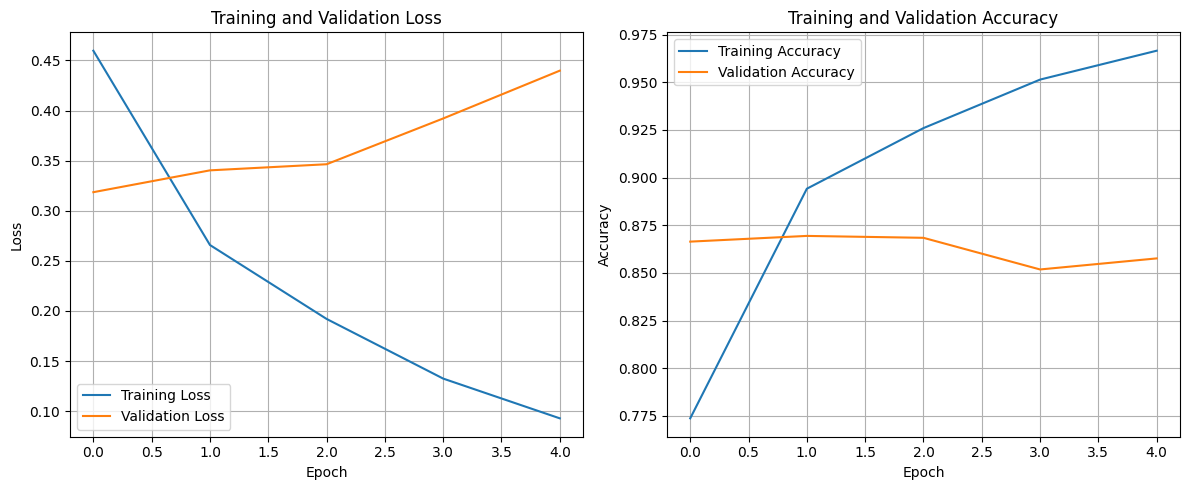


--- Evaluating the Text Classification Model ---
Test Loss: 0.4485
Test Accuracy: 0.8515
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 129ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.86      0.85     12500
    Positive       0.86      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



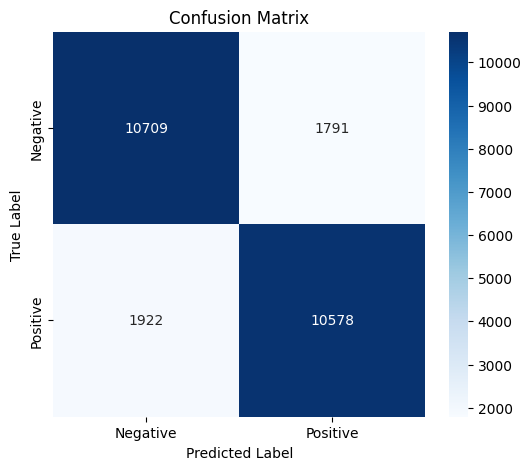


Text classification model built and evaluated.


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb # Using built-in IMDb dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("--- 5.3.1 Text Classification: Assigning Categories to Text ---")

# 1. Load the IMDb dataset
# num_words: keeps only the top N most frequent words
# The words are already indexed by frequency (e.g., 1 for "the", 2 for "a", etc.)
max_words = 10000 # Only consider the top 10,000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_words)

print(f"\nTraining data samples: {len(train_data)}")
print(f"Test data samples: {len(test_data)}")
print(f"Example training review (first few word indices):\n{train_data[0][:10]}...")
print(f"Example training label (0=negative, 1=positive): {train_labels[0]}")

# Map word indices back to words for inspection (optional)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# The indices in the dataset are offset by 3 (0, 1, 2 are for padding, start-of-sequence, unknown)
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(f"\nDecoded example review:\n{decoded_review[:200]}...")


# 2. Preprocessing: Padding sequences
# Reviews have different lengths; we need to pad them to a uniform length.
maxlen = 256 # Pad all sequences to 256 words
X_train_padded = pad_sequences(train_data, maxlen=maxlen)
X_test_padded = pad_sequences(test_data, maxlen=maxlen)

print(f"\nOriginal length of first training review: {len(train_data[0])}")
print(f"Padded length of first training review: {len(X_train_padded[0])}")
print(f"Padded training data shape: {X_train_padded.shape}")
print(f"Padded test data shape: {X_test_padded.shape}")


# 3. Model Building (LSTM for Text Classification)
# embedding_dim: The size of the vector space in which words will be embedded.
embedding_dim = 128
lstm_units = 128 # Number of LSTM cells

model_text_classification = models.Sequential([
    # Embedding Layer: input_dim is max_words + 1 (for 0-padding)
    layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    # LSTM Layer: processes the sequence of embeddings
    layers.LSTM(units=lstm_units),
    # Dense Layer: For further processing before output
    layers.Dense(units=64, activation='relu'),
    # Output Layer: 1 neuron for binary classification, 'sigmoid' for probability (0-1)
    layers.Dense(units=1, activation='sigmoid')
])

model_text_classification.summary()

# 4. Compile the model
# optimizer='adam': common and effective optimizer
# loss='binary_crossentropy': suitable for binary classification (outputs are 0 or 1)
# metrics=['accuracy']: metric to monitor during training
model_text_classification.compile(optimizer='adam',
                                  loss='binary_crossentropy',
                                  metrics=['accuracy'])


# 5. Train the model
epochs = 5
batch_size = 64

print(f"\n--- Training the Text Classification Model for {epochs} epochs ---")
history = model_text_classification.fit(
    X_train_padded, train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2, # Use 20% of training data for validation
    verbose=1
)

print("\nModel training complete!")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Evaluate the model on test data
print("\n--- Evaluating the Text Classification Model ---")
loss, accuracy = model_text_classification.evaluate(X_test_padded, test_labels, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_probs = model_text_classification.predict(X_test_padded)
# Convert probabilities to binary labels (0 or 1)
y_pred_labels = (y_pred_probs > 0.5).astype(int)

# Classification Report
print("\nClassification Report:")
print(classification_report(test_labels, y_pred_labels, target_names=['Negative', 'Positive']))

# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nText classification model built and evaluated.")

* **Exercise:**

    1.  What is the purpose of the `Embedding` layer in the text classification model? How does it relate to the `maxlen` parameter and `max_words` in `imdb.load_data()`?
    2.  Try changing the `units` in the `LSTM` layer (e.g., to 64 or 256). Retrain the model and observe if the validation accuracy changes significantly. What might be the trade-offs of increasing the number of LSTM units?

-----

### **5.3.2 Sentiment Analysis: Understanding Emotional Tone**

  * **Concept:**
    Sentiment analysis (also known as opinion mining) is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially to determine the writer's attitude toward a particular topic, product, etc. The attitude can be positive, negative, or neutral.

      * **Types of Sentiment Analysis:**

          * **Polarity:** Classifying text as positive, negative, or neutral (most common).
          * **Fine-grained Sentiment:** Classifying text with more nuance (e.g., very positive, positive, neutral, negative, very negative).
          * **Aspect-Based Sentiment Analysis (ABSA):** Identifying the specific aspects (features) of an entity and determining the sentiment expressed towards each aspect (e.g., "The camera is great, but the battery life is terrible.").
          * **Emotion Detection:** Identifying specific emotions like anger, joy, sadness, fear.

      * **Approaches:**

        1.  **Rule-Based Approaches:** Rely on a set of manually created rules or linguistic patterns (e.g., if a sentence contains "good" and "excellent" but not "bad," classify as positive).
        2.  **Lexicon-Based Approaches:** Use pre-compiled lists (lexicons) of words that are associated with positive or negative sentiment (e.g., VADER, SentiWordNet). The sentiment of a text is determined by aggregating the sentiment scores of its words.
        3.  **Machine Learning Approaches (Supervised):** Train models (like the LSTM model we just built) on large datasets of labeled text. This is the most common and often most accurate approach for complex sentiment analysis tasks.
        4.  **Deep Learning Approaches:** More advanced neural networks (CNNs, RNNs, Transformers) excel at learning complex patterns and contextual nuances for sentiment.

  * **Colab Example: Predicting Sentiment of New Movie Reviews**
    Since our previous `model_text_classification` was trained on the IMDb movie review dataset (positive/negative labels), it is inherently a sentiment analysis model. We will now use it to predict the sentiment of new, custom movie reviews.

In [15]:
print("\n--- 5.3.2 Sentiment Analysis: Understanding Emotional Tone ---")

# Define some new movie reviews
new_reviews = [
    "This movie was absolutely fantastic! I loved every minute of it. A true masterpiece.",
    "Terrible acting and boring plot. I regret watching this film.",
    "The movie was okay, nothing special. It had its moments but also its flaws.",
    "A surprisingly good film, much better than I expected. Highly recommended.",
    "Horrible, simply horrible. A waste of time and money."
]

# Preprocessing for new reviews:
# 1. Tokenize reviews using the same tokenizer used for training data (implicitly by imdb.load_data's indexing)
#    For custom text, you'd usually use a Keras Tokenizer (like in the Mini Project 4.4)
#    Here, we simulate the `imdb.load_data` style by mapping words to indices.
word_index = imdb.get_word_index() # Get the word-to-index mapping
# Create a function to convert new text to sequences, handling unknown words and max_words limit
def text_to_sequence_imdb_style(text, word_index, max_words, maxlen):
    tokens = text.lower().split()
    sequence = []
    for word in tokens:
        index = word_index.get(word) # Get index from pre-trained vocabulary
        if index is not None and index < max_words: # Ensure index is within our vocab limit
            sequence.append(index + 3) # Add 3 to match IMDb's original indexing (0,1,2 reserved)
        else:
            sequence.append(2) # '2' is the index for unknown words in IMDb dataset
    return pad_sequences([sequence], maxlen=maxlen)[0] # Pad a single sequence

new_sequences_processed = np.array([text_to_sequence_imdb_style(review, word_index, max_words, maxlen) for review in new_reviews])

print(f"\nOriginal new reviews (first one):\n'{new_reviews[0]}'")
print(f"Padded sequence for first new review (first 10 words):\n{new_sequences_processed[0][:10]}...")
print(f"Processed sequences shape: {new_sequences_processed.shape}")

# Make sentiment predictions
sentiment_predictions_probs = model_text_classification.predict(new_sequences_processed)

print("\n--- Sentiment Predictions for New Reviews ---")
for i, review in enumerate(new_reviews):
    sentiment_score = sentiment_predictions_probs[i][0]
    sentiment = "Positive" if sentiment_score > 0.5 else "Negative"
    print(f"Review: '{review[:80]}...'")
    print(f"Predicted Sentiment: {sentiment} (Score: {sentiment_score:.4f})\n")

# --- Brief conceptual example of Lexicon-based sentiment (no code execution, just concept) ---
print("\n--- Conceptual: Lexicon-based Sentiment Analysis ---")
print("Lexicon-based approaches use pre-defined lists of words with sentiment scores.")
print("Example: 'good' (+1), 'bad' (-1), 'amazing' (+2), 'terrible' (-2).")
print("A simple lexicon-based analysis for 'This movie was fantastic!':")
print("  'fantastic' might be +2.")
print("  Total score = +2. Therefore, Positive sentiment.")
print("While simpler, lexicon methods struggle with context, sarcasm, and negation (e.g., 'not good').")
print("Deep learning models learn these nuances from data.")


--- 5.3.2 Sentiment Analysis: Understanding Emotional Tone ---

Original new reviews (first one):
'This movie was absolutely fantastic! I loved every minute of it. A true masterpiece.'
Padded sequence for first new review (first 10 words):
[0 0 0 0 0 0 0 0 0 0]...
Processed sequences shape: (5, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step

--- Sentiment Predictions for New Reviews ---
Review: 'This movie was absolutely fantastic! I loved every minute of it. A true masterpi...'
Predicted Sentiment: Positive (Score: 0.7885)

Review: 'Terrible acting and boring plot. I regret watching this film....'
Predicted Sentiment: Negative (Score: 0.0264)

Review: 'The movie was okay, nothing special. It had its moments but also its flaws....'
Predicted Sentiment: Positive (Score: 0.7002)

Review: 'A surprisingly good film, much better than I expected. Highly recommended....'
Predicted Sentiment: Positive (Score: 0.7385)

Review: 'Horrible, simply horrible. A waste of time and money....'
Predicted S

* **Exercise:**

    1.  Write a new movie review of your own (e.g., 2-3 sentences) that you intend to be "neutral" or "mixed" in sentiment. Add it to the `new_reviews` list and rerun the prediction code. What sentiment does the model predict, and what does this tell you about its ability to handle nuanced sentiment?
    2.  Beyond movie reviews, list two other practical applications where sentiment analysis would be highly valuable.


## **5.4: Named Entity Recognition (NER)**


### **5.4.1 Introduction to Named Entity Recognition (NER)**

  * **Concept:**
    Imagine reading a news article and quickly identifying all the names of people, organizations, and places. That's essentially what Named Entity Recognition (NER) does, but for computers. NER is a process of identifying and categorizing key information (named entities) in text into predefined categories.

    The goal of NER is to turn unstructured text into structured data by highlighting and classifying the mentions of real-world objects.

  * **Why is NER important?**

      * **Information Extraction:** Automating the extraction of critical data points from documents (e.g., extracting company names, dates, and amounts from financial reports).
      * **Question Answering:** Identifying entities in a question helps a system find relevant answers (e.g., if the question is "Who founded Microsoft?", NER identifies "Microsoft" as an ORG and "who" indicates a PER).
      * **Search and Indexing:** Improving search relevance by allowing users to search for specific entity types.
      * **Text Summarization:** Highlighting key entities can aid in generating concise summaries.
      * **Chatbots/Virtual Assistants:** Understanding entities in user queries to provide more relevant responses.
      * **Legal Tech:** Identifying parties, dates, jurisdictions, and clauses in legal contracts.

  * **Common Entity Types:**
    While categories can vary, some widely recognized entity types include:

      * `PERSON` (PER): People, including fictional characters.
          * *Example:* **Barack Obama**, **Marilyn Monroe**
      * `NORP` (Nationalities, Religious, Political groups):
          * *Example:* **American**, **Christian**, **Republican**
      * `FAC` (Facilities): Buildings, airports, highways, bridges, etc.
          * *Example:* **Eiffel Tower**, **Golden Gate Bridge**
      * `ORG` (Organization): Companies, agencies, institutions, etc.
          * *Example:* **Google**, **United Nations**, **Harvard University**
      * `GPE` (Geopolitical Entity): Countries, cities, states.
          * *Example:* **Paris**, **France**, **New York City**
      * `LOC` (Location): Non-GPE locations, mountain ranges, bodies of water.
          * *Example:* **Mount Everest**, **Pacific Ocean**
      * `PRODUCT`: Objects, vehicles, foods, etc. (not services).
          * *Example:* **iPhone**, **Tesla Model S**
      * `EVENT`: Named hurricanes, battles, wars, sports events, etc.
          * *Example:* **World War II**, **Olympics**
      * `WORK_OF_ART`: Titles of books, songs, movies, etc.
          * *Example:* **"Mona Lisa"**, **"Star Wars"**
      * `LAW`: Named legislative acts or documents.
          * *Example:* **Americans with Disabilities Act**
      * `DATE`: Absolute or relative dates or periods.
          * *Example:* **July 30, 2025**, **next week**, **1990s**
      * `TIME`: Times smaller than a day.
          * *Example:* **10:30 PM**, **noon**
      * `PERCENT`: Percentage (%).
          * *Example:* **50%**, **eighty percent**
      * `MONEY`: Monetary values, including currency symbols.
          * *Example:* **$1,000**, **€50**
      * `QUANTITY`: Measurements, as of weight or distance.
          * *Example:* **10 miles**, **5 kg**
      * `ORDINAL`: "first", "second", etc.
          * *Example:* **first**, **third**
      * `CARDINAL`: Numerals that do not fall under other types.
          * *Example:* **two**, **100**

  * **Colab Explanation:**

In [16]:
print("--- 5.4.1 Introduction to Named Entity Recognition (NER) ---")

sample_text = "Apple Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne on April 1, 1976, in Cupertino, California. Today, it is headquartered in Cupertino and is led by CEO Tim Cook. The company reported a revenue of $383.29 billion in 2023."

print(f"Original Text:\n'{sample_text}'")

print("\nImagine we want to extract key pieces of information from this text:")
print("- Who are the 'PERSON' entities (e.g., Steve Jobs, Tim Cook)?")
print("- What are the 'ORG' (Organization) entities (e.g., Apple Inc.)?")
print("- Where are the 'GPE' (Geopolitical Entity) entities (e.g., Cupertino, California)?")
print("- What are the 'DATE' entities (e.g., April 1, 1976)?")
print("- What are the 'MONEY' entities (e.g., $383.29 billion)?")

print("\nNER automates this process by identifying spans of text that are names or numerical expressions, and then classifying them into predefined categories.")

--- 5.4.1 Introduction to Named Entity Recognition (NER) ---
Original Text:
'Apple Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne on April 1, 1976, in Cupertino, California. Today, it is headquartered in Cupertino and is led by CEO Tim Cook. The company reported a revenue of $383.29 billion in 2023.'

Imagine we want to extract key pieces of information from this text:
- Who are the 'PERSON' entities (e.g., Steve Jobs, Tim Cook)?
- What are the 'ORG' (Organization) entities (e.g., Apple Inc.)?
- Where are the 'GPE' (Geopolitical Entity) entities (e.g., Cupertino, California)?
- What are the 'DATE' entities (e.g., April 1, 1976)?
- What are the 'MONEY' entities (e.g., $383.29 billion)?

NER automates this process by identifying spans of text that are names or numerical expressions, and then classifying them into predefined categories.


* **Exercise:**

    1.  Consider a document detailing a court case. List at least three specific named entity types that would be highly relevant to extract for a legal professional, and provide an example for each.
    2.  Why is simply looking for capitalized words insufficient for accurate NER? Provide an example.

-----

### **5.4.2 NER Approaches and SpaCy Implementation**

  * **Concept:**
    NER has evolved through several approaches:

      * **Rule-based Systems:** Early methods relied on hand-crafted rules, dictionaries, and patterns (e.g., "word starts with capital letter, followed by another capital letter" for person names). These are precise but brittle and don't scale well.
      * **Statistical Models:** Machine learning models like Hidden Markov Models (HMMs), Conditional Random Fields (CRFs), and Support Vector Machines (SVMs) were trained on large labeled datasets to learn patterns.
      * **Deep Learning Models:** Current state-of-the-art NER systems primarily use deep learning architectures, often combining:
          * **Word Embeddings:** To capture semantic meaning (Word2Vec, GloVe).
          * **Recurrent Neural Networks (RNNs) / Bi-directional LSTMs:** To capture sequential context.
          * **Conditional Random Fields (CRFs):** Often used as an output layer on top of LSTMs to ensure that the predicted sequence of tags is valid (e.g., "I-PER" cannot follow "B-ORG").
          * **Transformers (e.g., BERT, RoBERTa):** These models, pre-trained on massive text corpuses, learn highly contextual embeddings and achieve superior performance. Fine-tuning these models is the most common and effective modern approach.

    **SpaCy** is a powerful and efficient NLP library for Python. It provides pre-trained statistical models that include NER capabilities. These models are highly optimized and suitable for production use, making SpaCy an excellent choice for quickly implementing robust NER.

  * **Colab Example: Implementing NER with SpaCy**
    First, you need to install SpaCy and download a language model.

In [17]:
# --- Install SpaCy and download a small English model ---
# This might take a minute the first time you run it in a Colab session.
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy
from spacy import displacy # For visualizing NER results

print("\n--- 5.4.2 NER Approaches and SpaCy Implementation ---")

# Load the English language model
try:
    nlp = spacy.load("en_core_web_sm")
    print("\nSpaCy model 'en_core_web_sm' loaded successfully.")
except OSError:
    print("\nSpaCy model 'en_core_web_sm' not found. Please ensure it was downloaded successfully.")
    print("You might need to restart the Colab runtime after executing the download command.")
    exit() # Exit if model cannot be loaded for demonstration

# Text for NER
text = "Apple Inc. is considering buying a UK startup for $1 billion. Tim Cook met with the Prime Minister of Canada, Justin Trudeau, in Ottawa on Monday, June 24, 2024. The discussions included AI regulations and trade agreements."

print(f"\nText for NER analysis:\n'{text}'")

# Process the text with the SpaCy model
doc = nlp(text)

# Print detected entities
print("\nDetected Named Entities:")
for ent in doc.ents:
    print(f"  Text: '{ent.text}' | Label: '{ent.label_}' | Explanation: {spacy.explain(ent.label_)}")

# Visualize entities using displacy
print("\n--- Visualizing Named Entities ---")
displacy.render(doc, style="ent", jupyter=True)

# Example with a legal-themed text (similar to the mini-project context)
legal_text = "On January 15, 2023, Attorney Jane Doe, representing Acme Corp. from New York, filed a motion in the District Court of California seeking $500,000 in damages against Global Widgets Ltd."

print(f"\nLegal Text for NER analysis:\n'{legal_text}'")
doc_legal = nlp(legal_text)
print("\nDetected Named Entities in Legal Text:")
for ent in doc_legal.ents:
    print(f"  Text: '{ent.text}' | Label: '{ent.label_}' | Explanation: {spacy.explain(ent.label_)}")

print("\n--- Visualizing Named Entities in Legal Text ---")
displacy.render(doc_legal, style="ent", jupyter=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

--- 5.4.2 NER Approaches and SpaCy Implementation ---

SpaCy model 'en_core_web_sm' loaded successfully.

Text for NER analysis:
'Apple Inc. is considering buying a UK startup for $1 billion. Tim Cook met with the Prime Minister of Canada, Justin Trudeau, in Ottawa on Monday, June 24, 2024. The discussions included AI regulations and trade agreements.'

Detected Named Entities:
  Text: 'Apple Inc.' | Label: 'ORG' | Explanation: Companies, agencies, institutions, etc.
  Text: 'UK' | Label: 'GPE' | Explanation: Countries, cities, states
  Text: '$1 billion' | Label: 'MONEY' | E


Legal Text for NER analysis:
'On January 15, 2023, Attorney Jane Doe, representing Acme Corp. from New York, filed a motion in the District Court of California seeking $500,000 in damages against Global Widgets Ltd.'

Detected Named Entities in Legal Text:
  Text: 'January 15, 2023' | Label: 'DATE' | Explanation: Absolute or relative dates or periods
  Text: 'Jane Doe' | Label: 'PERSON' | Explanation: People, including fictional
  Text: 'Acme Corp.' | Label: 'ORG' | Explanation: Companies, agencies, institutions, etc.
  Text: 'New York' | Label: 'GPE' | Explanation: Countries, cities, states
  Text: 'the District Court of' | Label: 'ORG' | Explanation: Companies, agencies, institutions, etc.
  Text: '500,000' | Label: 'MONEY' | Explanation: Monetary values, including unit
  Text: 'Global Widgets Ltd.' | Label: 'ORG' | Explanation: Companies, agencies, institutions, etc.

--- Visualizing Named Entities in Legal Text ---


* **Exercise:**

    1.  Provide a short sentence (2-3 sentences) where a common word (e.g., "May") can be both a `DATE` and something else (e.g., a `PERSON` or a verb). Run SpaCy's NER on it. Does SpaCy correctly identify both potential meanings based on context?
    2.  Based on the example, explain how SpaCy handles "Global Widgets Ltd." Is it treated as a single entity or multiple? What category is it assigned, and why is this useful for understanding legal documents?
